# Anfis 

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, 'code/')
from anfis import ANFIS, predict
import membershipfunction

In [35]:
def doAnfis(X_train, X_test, Y_train, Y_test, epochs, mf):
    # Initialize Membership functions and ANFIS
    mfc = membershipfunction.MemFuncs(mf)
    anf = ANFIS(X_train, Y_train, mfc)
    
    # Train the ANFIS model
    anf.trainHybridJangOffLine(epochs=epochs)
    
    # Make predictions on the test set
    predictions = predict(anf, X_test)
    
    # Post-process predictions to match Y_train/Y_test dimensions
    # Rounding predictions to the nearest integer as the output should be categorical
    predictions_rounded = np.rint(predictions).astype(int).flatten()
    
    # Ensure predictions are within the valid label range
    min_label = Y_train.min()
    max_label = Y_train.max()
    predictions_clipped = np.clip(predictions_rounded, min_label, max_label)
    
    # Accuracy calculation
    accuracy = accuracy_score(Y_test, predictions_clipped)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Optionally, plot errors and results
    
    ## TODO: add lines to the error plots ####
    anf.plotErrors()
    anf.plotResults()
    
    return anf, predictions_clipped

In [41]:
# processed_data = pd.read_csv('anfis_input.csv')
# print("Data loaded")

# Read the TSV file into a DataFrame
processed_data = pd.read_csv('anfis_input.tsv', sep='\t')

# No need to convert columns as the commas in the lists are preserved
print(processed_data.head())

                                                Text  Subjectivity  \
0  great budget even cigarette touched great work...             1   
1  exactly scanned budget throughout earth make i...             1   
2  already smoking cessation program people want ...             1   
3  alcohol fuel private vehicle raising tax cigar...             1   
4  practical say third world country supposed eur...             1   

  Sentiment Polarity       Emotion  Sarcasm  Irony  Negation  \
0           positive         trust        0      0         1   
1           negative       disgust        0      0         1   
2            neutral  anticipation        0      0         0   
3           negative       sadness        0      0         0   
4           negative         anger        0      0         1   

                                            Raw_Text  \
0  Great BUDGET . Even cigarettes were not touche...   
1  I haven't exactly scanned the budget throughou...   
2  There’s already smoking

In [39]:
max_len = processed_data['tokens'].apply(len).max()
print(max_len)

1858


current error: 3211.2936538801905


current error: 3207.0980859356596


current error: 3199.986772316126


current error: 3189.52437223615


current error: 3173.1386172757366


current error: 3155.9327722438816


current error: 3117.6367526380945


current error: 3055.537922251844


current error: 3024.8091020962192


current error: 3046.1131295712885


current error: 3045.005655311402


current error: 3046.4125517568914


current error: 3049.704439067579


current error: 3055.4275148764705


current error: 3065.983379502131


current error: 3100.69737324192


current error: 3149.326858200879


current error: 3157.71854912839


current error: 3161.879481057459


current error: 3157.3622632839083


current error: 3158.0643978063454


current error: 3158.7408245776624


current error: 3159.393639938863


current error: 3160.02477144937


current error: 3160.6360397629714


current error: 3161.229216473809


current error: 3161.806085307163


current error: 3162.3685154080326


current error: 3162.9185594386754


current error: 3163.4585978091554


current error: 3163.9915687745647


current error: 3164.521365582224


current error: 3165.0535838741957


current error: 3165.5970869343037


current error: 3166.1677991972897


current error: 3166.8001858782554


current error: 3167.59899654482


current error: 3169.4629137550937


current error: 3169.687545389482


current error: 3170.87572589276


current error: 3170.878881324871


current error: 3171.87526573424


current error: 3171.880887196393


current error: 3168.0177051714663


current error: 3170.1299058313075


current error: 3172.3071970124483


current error: 3174.717146343228


current error: 3178.558827638713


current error: 3177.8899346893227


current error: 3177.427946566018


current error: 3177.3301772482737


current error: 3177.109613938759


current error: 3178.023709802257


current error: 3176.626971369292


current error: 3178.13653369718


current error: 3176.7599250498597


current error: 3178.261028001104


current error: 3176.894821641119


current error: 3178.392258046172


current error: 3177.046280168277


current error: 3178.54026426873


current error: 3177.220645982481


current error: 3178.711483558697


current error: 3177.4281494086867


current error: 3178.9161750499884


current error: 3177.685538200658


current error: 3179.171179594513


current error: 3178.0211018056298


current error: 3179.5049639521594


current error: 3178.4777661982907


current error: 3179.960781795304


current error: 3179.0783015414386


current error: 3180.561708152466


current error: 3179.7185619032084


current error: 3181.2031797486397


current error: 3180.3073809097614


current error: 3181.7933973101935


current error: 3180.863099337212


current error: 3182.3517512909816


current error: 3181.430419478438


current error: 3182.9235907088714


current error: 3182.105334952498


current error: 3183.6208805674232


current error: 3192.2655031512077


current error: 3193.5687414992753


current error: 3194.8336126596714


current error: 3196.06833138961


current error: 3197.2843849343226


current error: 3198.499078312614


current error: 3199.741766986076


current error: 3201.067448423115


current error: 3201.9519130032622


current error: 3199.4292726282856


current error: 3195.2483966071195


current error: 3187.753457858077


current error: 3185.26275042074


current error: 3179.5321478880824


current error: 3172.78107103919


current error: 3164.6861300707515


current error: 3152.899291297296


current error: 3134.7074989974717


current error: 3122.002714294134


current error: 3134.7912214209914


current error: 3121.871984445686


current error: 3120.743788143337


current error: 3105.3488395258437


current error: 3123.726033836936


current error: 3107.232327029671


current error: 3123.471767213253


current error: 3107.7003595162682


current error: 3124.9930831333204


current error: 3110.8498054709326


current error: 3101.467006225299


current error: 3112.4172677229108


current error: 3100.0922945134243


current error: 3112.016898694431


current error: 3100.1179486309784


current error: 3113.186129340029


current error: 3101.884126905503


current error: 3114.346855746634


current error: 3101.672552565473


current error: 3115.4395792104515


current error: 3102.435840958815


current error: 3116.606265201078


current error: 3104.0967676720984


current error: 3119.2322051996334


current error: 3108.292619160564


current error: 3097.7268426338583


current error: 3109.4776663063594


current error: 3098.4149284011087


current error: 3109.26696005792


current error: 3098.3788232655497


current error: 3110.2498890362613


current error: 3099.1776642562027


current error: 3111.2602623991206


current error: 3100.4139667200043


current error: 3112.4802656445463


current error: 3102.1085671913033


current error: 3096.634278788214


current error: 3108.4142274166643


current error: 3097.679004269482


current error: 3108.3886957872573


current error: 3098.841437916085


current error: 3109.6107962161254


current error: 3100.4290698301293


current error: 3094.420430601487


current error: 3104.703516107047


current error: 3095.198565259336


current error: 3104.6403509635757


current error: 3096.0917026371603


current error: 3105.549034466042


current error: 3097.137957395747


current error: 3106.672180358399


current error: 3098.5059022594405


current error: 3102.4216209349916


current error: 3101.8991830000186


current error: 3101.725770642022


current error: 3101.808768780217


current error: 3102.0813036481854


current error: 3102.494957716434


current error: 3103.014167361544


current error: 3103.6123717083747


current error: 3104.2694182026103


current error: 3104.969802352276


current error: 3105.7014537894675


current error: 3106.454882999018


current error: 3107.22256994456


current error: 3107.9985179510295


current error: 3108.7779226304046


current error: 3109.5569223678685


current error: 3110.3324076347794


current error: 3111.1018734171867


current error: 3111.863303716631


current error: 3112.6150802356187


current error: 3113.3559095300943


current error: 3114.0847644248834


current error: 3114.800836561294


current error: 3115.5034977172318


current error: 3116.1922681003934


current error: 3116.8667902291345


current error: 3117.526807323237


current error: 3118.172145358917


current error: 3118.8026981186786


current error: 3119.4184147023166


current error: 3120.0192890698345


current error: 3120.605351269133


current error: 3121.176660065237


current error: 3121.7332967385405


current error: 3122.275359859985


current error: 3122.8029608828565


current error: 3123.316220416707


current error: 3123.8152650693582


current error: 3124.3002247592385


current error: 3124.771230413574


current error: 3125.2284119783267


current error: 3125.671896673609


current error: 3126.101807435274


current error: 3126.5182614873984


current error: 3126.921368994289


Processing: 100%|█████████▉| 199/200 [4:18:43<01:18, 78.01s/it]


Accuracy: 14.41%


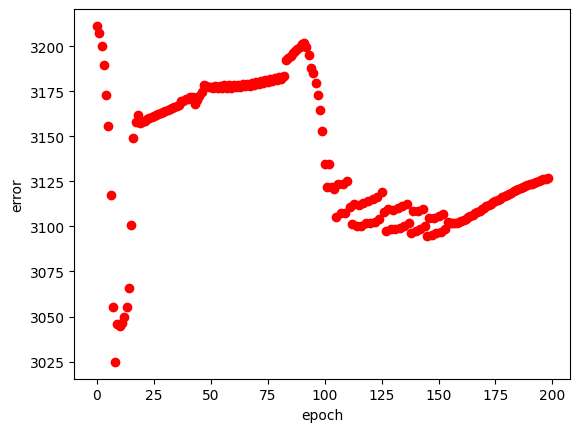

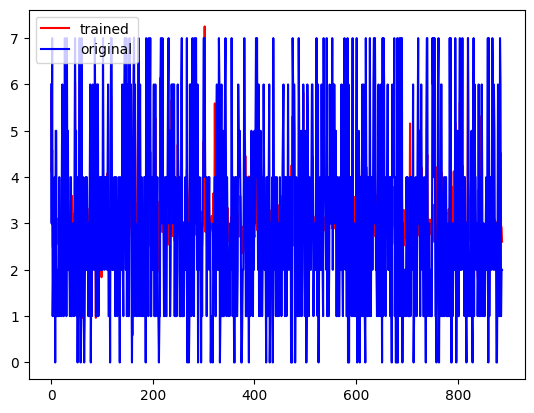

In [9]:
to_keep = ['exclamation_score', 'question_score', 'obj_score', 'afinn_score', 'vader_neu', 'vader_pos']

mf = [
    # exclamation_score
    [['gaussmf', {'mean': 0.00, 'sigma': 0.23}],  # Low
     ['gaussmf', {'mean': 0.07, 'sigma': 0.23}]],  # High

    # question_score
    [['gaussmf', {'mean': 0.00, 'sigma': 0.18}],  # Low
     ['gaussmf', {'mean': 0.05, 'sigma': 0.18}]],  # High

    # obj_score
    [['gaussmf', {'mean': 0.68, 'sigma': 0.15}],  # Low
     ['gaussmf', {'mean': 0.86, 'sigma': 0.15}]],  # High

    # afinn_score
    [['gaussmf', {'mean': -0.07, 'sigma': 0.33}],  # Negative
     ['gaussmf', {'mean': 0.14, 'sigma': 0.33}]],  # Positive

    # vader_neu
    [['gaussmf', {'mean': 0.70, 'sigma': 0.17}],  # Neutral Low
     ['gaussmf', {'mean': 0.90, 'sigma': 0.17}]],  # Neutral High

    # vader_pos
    [['gaussmf', {'mean': 0.05, 'sigma': 0.14}],  # Positive Low
     ['gaussmf', {'mean': 0.18, 'sigma': 0.14}]]  # Positive High
]

# Subset the dataframe for input features
fuzzy_data = processed_data[to_keep]

# Mapping the target variable (Emotion) to numeric values
mapping_dict = {value: index for index, value in enumerate(processed_data['Emotion'].unique())}
processed_data['Emotion_mapped'] = processed_data['Emotion'].map(mapping_dict)

# Input (X) and Target (Y) variables
X = fuzzy_data.values
Y = processed_data['Emotion_mapped'].values

# Split the data into training and testing sets using train_test_split with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

anfis_model, _ = doAnfis(X_train, X_test, Y_train, Y_test, 200, mf)

In [5]:
# # Features to keep for the fuzzy system
# to_keep = ['exclamation_score', 'question_score', 'ellipsis_score', 'obj_score', 'afinn_score', 'irony_score', 'vader_neg', 'vader_neu', 'vader_pos']

# mf = [
#     # exclamation_score
#     [['gaussmf', {'mean': 0.00, 'sigma': 0.23}],
#      ['gaussmf', {'mean': 0.07, 'sigma': 0.23}]],
#     # question_score
#     [['gaussmf', {'mean': 0.00, 'sigma': 0.18}],
#      ['gaussmf', {'mean': 0.05, 'sigma': 0.18}]],
#     # ellipsis_score
#     [['gaussmf', {'mean': 0.00, 'sigma': 0.08}],
#      ['gaussmf', {'mean': 0.02, 'sigma': 0.08}]],
#     # obj_score
#     [['gaussmf', {'mean': 0.68, 'sigma': 0.15}],
#      ['gaussmf', {'mean': 0.86, 'sigma': 0.15}]],
#     # afinn_score
#     [['gaussmf', {'mean': -0.07, 'sigma': 0.33}],
#      ['gaussmf', {'mean': 0.14, 'sigma': 0.33}]],
#     # irony_score
#     [['gaussmf', {'mean': 0.10, 'sigma': 0.23}],
#      ['gaussmf', {'mean': 0.45, 'sigma': 0.23}]],
#     # vader_neg
#     [['gaussmf', {'mean': 0.05, 'sigma': 0.12}],
#      ['gaussmf', {'mean': 0.13, 'sigma': 0.12}]],
#     # vader_neu
#     [['gaussmf', {'mean': 0.7, 'sigma': 0.17}],
#      ['gaussmf', {'mean': 0.9, 'sigma': 0.17}]],
#     # vader_pos
#     [['gaussmf', {'mean': 0.05, 'sigma': 0.14}],
#      ['gaussmf', {'mean': 0.18, 'sigma': 0.14}]]
# ]

# # Subset the dataframe for input features
# fuzzy_data = processed_data[to_keep]

# # Mapping the target variable (Emotion) to numeric values
# mapping_dict = {value: index for index, value in enumerate(processed_data['Emotion'].unique())}
# processed_data['Emotion_mapped'] = processed_data['Emotion'].map(mapping_dict)

# # Input (X) and Target (Y) variables
# X = fuzzy_data.values
# Y = processed_data['Emotion_mapped'].values

# # Split the data into training and testing sets using train_test_split with stratification
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# anfis_model, _ = doAnfis(X_train, X_test, Y_train, Y_test, 25, mf)

Processing:   0%|          | 0/25 [00:00<?, ?it/s]

current error: 2944.2087668602735


Processing:   4%|▍         | 1/25 [47:09<18:51:50, 2829.61s/it]

current error: 2952.1413253454


Processing:   8%|▊         | 2/25 [1:34:54<18:12:44, 2850.64s/it]

current error: 2960.396168045645


Processing:  12%|█▏        | 3/25 [2:22:45<17:28:29, 2859.51s/it]

current error: 2968.3621409359257


Processing:  16%|█▌        | 4/25 [3:10:37<16:42:40, 2864.79s/it]

current error: 2975.493446937623


Processing:  20%|██        | 5/25 [3:58:28<15:55:35, 2866.78s/it]

current error: 2981.4641266094195


Processing:  24%|██▍       | 6/25 [4:46:19<15:08:20, 2868.45s/it]

current error: 2986.266241248649


Processing:  28%|██▊       | 7/25 [5:34:04<14:20:09, 2867.18s/it]

current error: 2990.0921983095304


Processing:  32%|███▏      | 8/25 [6:21:38<13:31:11, 2863.06s/it]

current error: 2993.1562733813143


Processing:  36%|███▌      | 9/25 [7:09:36<12:44:42, 2867.63s/it]

current error: 2995.624557930308


Processing:  40%|████      | 10/25 [7:57:39<11:58:07, 2872.50s/it]

current error: 2997.6801999331838


Processing:  44%|████▍     | 11/25 [8:45:37<11:10:36, 2874.02s/it]

current error: 2999.590435565889


Processing:  48%|████▊     | 12/25 [9:33:50<10:23:58, 2879.86s/it]

KeyboardInterrupt: 

current error: 3211.2936538801905


current error: 3207.0980859356596


current error: 3199.986772316126


current error: 3189.52437223615


current error: 3173.1386172757366


current error: 3155.9327722438816


current error: 3117.6367526380945


Processing:  88%|████████▊ | 7/8 [10:52<01:33, 93.15s/it]


Accuracy: 15.77%


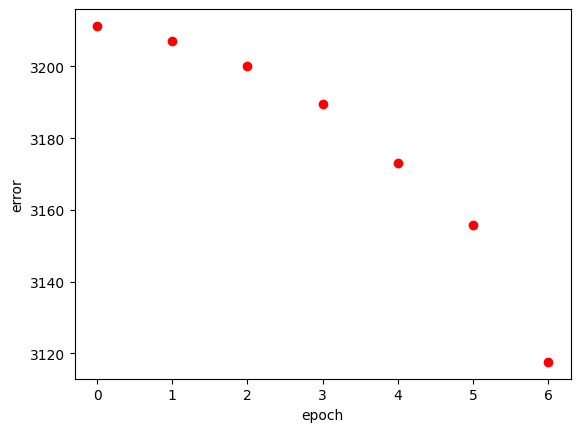

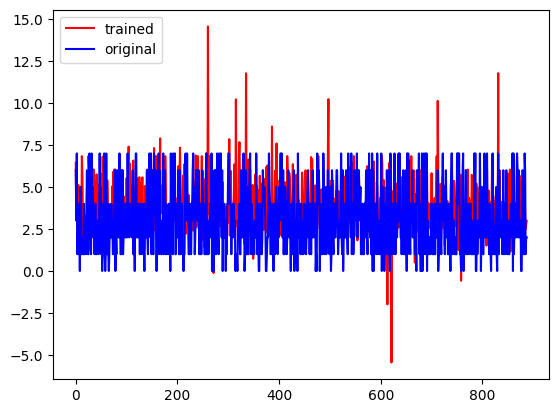

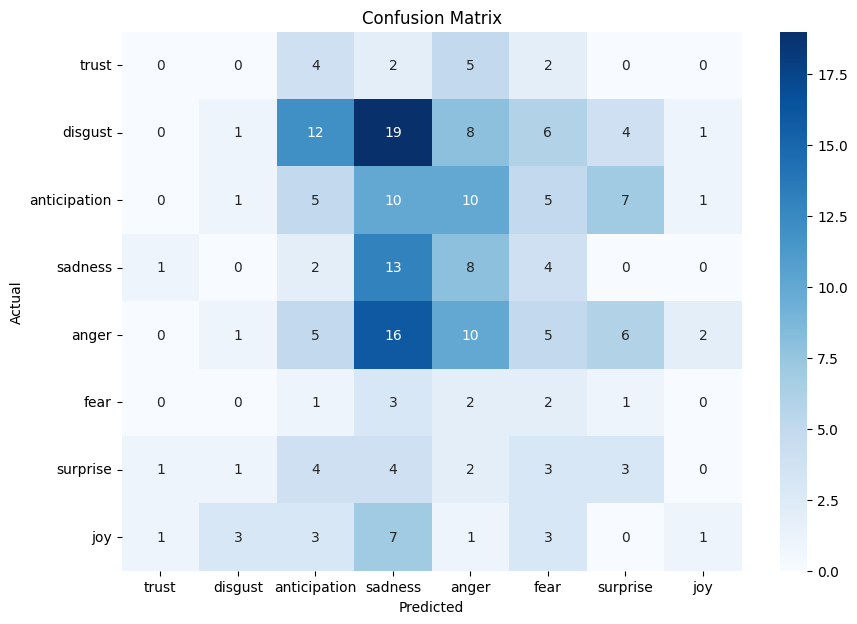

In [13]:
anfis_model_2, predictions_2 = doAnfis(X_train, X_test, Y_train, Y_test, 9, mf)

cm = confusion_matrix(Y_test, predictions_2)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=mapping_dict.keys(), yticklabels=mapping_dict.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



In [30]:
max_len = processed_data['tokens'].apply(len).max()
print(max_len)

1858


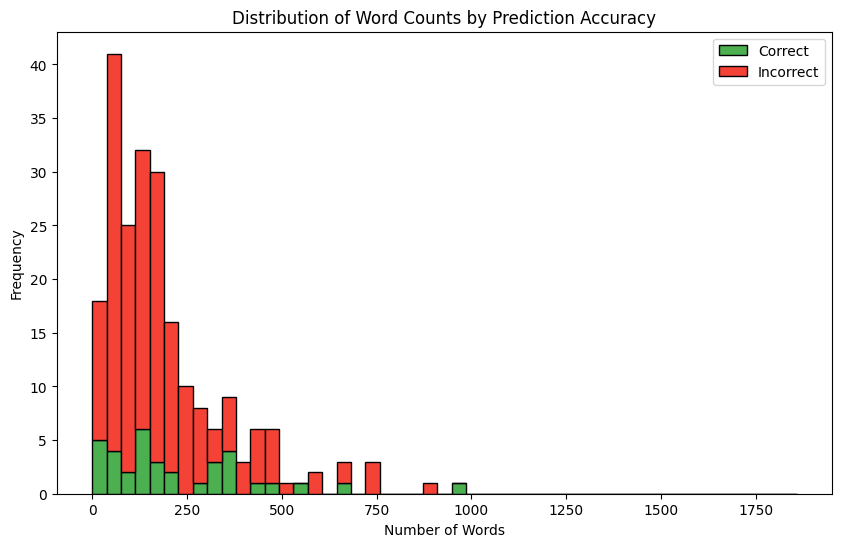

In [29]:
# Assuming Y_test is a NumPy array, get the original indices from the test set
test_indices = processed_data.index[X_train.shape[0]:]  # Assuming the data was split sequentially

# Find indices of correct and incorrect predictions
correct_indices = np.where(predictions_2 == Y_test)[0]
incorrect_indices = np.where(predictions_2 != Y_test)[0]

# Use the test indices to map back to the processed_data dataframe
correct_test_indices = test_indices[correct_indices]
incorrect_test_indices = test_indices[incorrect_indices]

# Get the lengths of 'Text' for correct and incorrect predictions
correct_text_lengths = processed_data.loc[correct_test_indices, 'tokens'].apply(len)
incorrect_text_lengths = processed_data.loc[incorrect_test_indices, 'tokens'].apply(len)

# Define the bin edges for the text lengths
bins = np.linspace(0, max(processed_data['tokens'].apply(len)), 50)

# Prepare the data for the histogram
correct_hist, _ = np.histogram(correct_text_lengths, bins=bins)
incorrect_hist, _ = np.histogram(incorrect_text_lengths, bins=bins)

# Create the plot with stacked bars
plt.figure(figsize=(10, 6))

# Plot histograms stacked on top of each other, similar to the uploaded example
plt.hist([correct_text_lengths, incorrect_text_lengths], bins=bins, stacked=True,
         label=['Correct', 'Incorrect'], color=['#4CAF50', '#F44336'], edgecolor='black')

# Add labels and title
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts by Prediction Accuracy')
plt.legend()

# Show the plot
plt.show()

Why a Mix of MFs Can Be Beneficial:
sigmf:
Ideal for sharp transitions or binary-like variables (e.g., "none" vs. "some").
Use when you want to model a sudden shift from one state to another (e.g., exclamations going from 0 to higher values).
gaussmf:
Well-suited for variables with a continuous, smooth, symmetric distribution (e.g., objective scores, joy scores).
Works well for cases where the spread of the data is relatively consistent.
gbellmf:
Offers flexibility in controlling both the steepness and spread of the MF, making it useful for features where the transition is gradual but not perfectly symmetrical.
Use this when you need finer control over how quickly a variable transitions from low to high, especially when the data shows asymmetry or varying slopes in different regions.
Revisiting Your Data Table and Potential MF Mix:
Let’s analyze the data and determine where each MF type would be most appropriate.

Data Summary:

| Feature | Description | Potential MF Type |
| -------- | ------- | ------- |
|exclamation_score | Most data is clustered at 0, with occasional high values | sigmf for sharp transition from none to some |
|question_score | Most data at 0, but occasional jumps to higher values | sigmf or gbellmf for smooth transition |
|obj_score | Relatively continuous data between 0.68 and 1 | gaussmf for smooth continuous modeling |
|joy_score | Data primarily at 0, but extends towards 1 | sigmf for the 0-to-some transition and gaussmf for the upper range |
|vader_neg | Some data near 0 with gradual increase to 1 | gbellmf or gaussmf to handle gradual transitions |
|vader_pos | Similar to vader_neg, mostly low values but gradual increase to 1 | gbellmf for flexibility in transition | 



exclamation_score (sigmf):
Since the data is mostly 0 but jumps to higher values, a sharp transition is appropriate here.

question_score (sigmf or gbellmf):
Similar to exclamation_score, but if the transition isn’t as sharp, a gbellmf can provide more control over how smooth the transition is.

obj_score (gaussmf):
Since the data has a continuous spread, a gaussmf is well-suited for modeling this smoothly.

joy_score (sigmf + gaussmf):
Most data is 0, so a sigmf can handle the sharp transition from no joy to some joy, followed by a gaussmf for modeling the upper end of the distribution.

vader_neg (gbellmf or gaussmf):
Since there’s a gradual increase from neutral to strong negativity, a gbellmf can give you more control over the transition, but a gaussmf may work too if the data is smooth enough.

vader_pos (gbellmf):
Same rationale as vader_neg—gradual transition from neutral to positive sentiment, best modeled with a gbellmf for flexibility.


Based on the summary statistics we created for each of the six features, we can tailor the membership functions (MFs) for the fuzzy system. The goal is to capture the distribution of each feature effectively by setting appropriate mean and sigma values for Gaussian membership functions.


	    exclamation_score	question_score	obj_score	joy_score	vader_neg	vader_pos
count	1110.000000	        1110.000000	    1110.000000	1110.000000	1110.000000	1110.000000
mean	0.065042	        0.042836	    0.764637	0.044619	0.086072	0.123200
std	    0.231353	        0.184856	    0.146033	0.085424	0.119278	0.137306
min	    0.000000	        0.000000	    0.000000	0.000000	0.000000	0.000000
25%	    0.000000	        0.000000	    0.680783	0.000000	0.000000	0.000000
50%	    0.000000	        0.000000	    0.775212	0.000000	0.046000	0.099000
75%	    0.000000	        0.013289	    0.861111	0.064516	0.131000	0.177750
max	    3.000000	        4.000000	    1.000000	1.000000	1.000000	1.000000


General Approach:
Mean (mean): Set based on typical values such as quartiles or based on the distribution's central tendency (e.g., mean or median).
Sigma (sigma): Set based on the spread of the data, using standard deviation or a fraction of the feature range.


1. exclamation_score
Range: [0, 3] with most data around 0 (75% of the data has a value of 0).
Mean: You might consider separating between "no exclamations" and "has exclamations". Set one MF around 0 for the bulk of the data and another around the mean or a higher value for rare instances of multiple exclamations.
Sigma: Based on the standard deviation (0.23), choose a moderate width for the Gaussians.

2. question_score
Range: [0, 4], with most data around 0 (median and 75% are 0).
Mean: Similar to exclamation_score, most data is 0. So, you can have one MF around 0 and another around the mean or a larger value.
Sigma: The standard deviation is 0.18, so the spread should reflect this.

3. obj_score
Range: [0, 1], with mean 0.76, most data between 0.68 and 0.86.
Mean: Since this feature seems to be concentrated in the higher range (close to 1), you could have MFs representing low, medium, and high scores.
Sigma: With a standard deviation of 0.15, MFs should have moderate overlap.

4. joy_score
Range: [0, 1], with most data clustered around 0 (50% of the data is 0, mean is 0.044).
Mean: You can have one MF for "no joy" around 0 and another for "presence of joy" closer to 1.
Sigma: Standard deviation is 0.085, so use small spread.

5. vader_neg (Negative sentiment)
Range: [0, 1], with most data concentrated at 0, but there's a small tail up to 1.
Mean: Have one MF around 0 for neutral sentiment, and another for stronger negative sentiment around 1.
Sigma: Standard deviation is 0.12, so a relatively narrow spread can be used.

6. vader_pos (Positive sentiment)
Range: [0, 1], mean is 0.12, with most data below 0.18.
Mean: Have one MF for neutral sentiment around 0, and another for positive sentiment closer to 1.
Sigma: Similar to vader_neg, standard deviation is 0.14, so a narrow spread can be used.

Explanation:
exclamation_score and question_score: Since most values are 0, we use two MFs to separate "no exclamation/question" from "some exclamations/questions".
obj_score: A higher range, and since values cluster around 0.76, we have three MFs representing low, medium, and high objectivity.
joy_score, vader_neg, and vader_pos: These use two or three MFs to represent "none", "some", and "strong" joy/negativity/positivity.
This setup gives a good balance between capturing the typical range and outliers in your dataset.